In [1]:
# Importing Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Loading Data
df = pd.read_csv("C:/Users/JK_al/OneDrive/Escritorio/Datos_2025/job_postings_flat.csv")

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_US = df[df['job_country']=='United States'].copy()
df_skills = df_US.explode('job_skills')
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

In [3]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles=sorted(job_titles[:3])

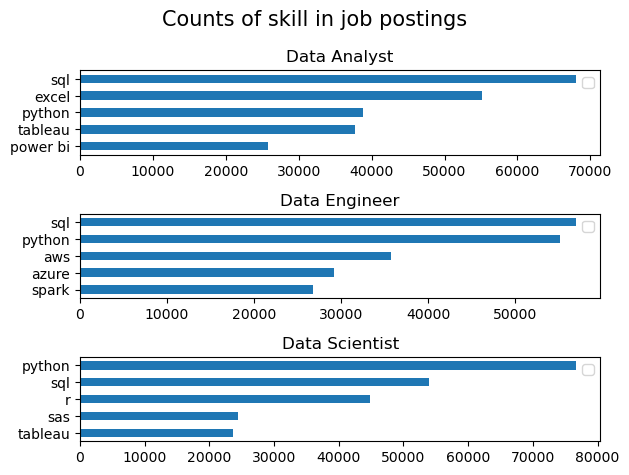

In [4]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].legend('')
    ax[i].set_ylabel('')
fig.suptitle('Counts of skill in job postings', fontsize=15)
fig.tight_layout()

plt.show()


In [5]:
df_US_jobs_total = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')
df_US_jobs_total 

,job_title_short,jobs_total
0,Data Analyst,152726
1,Data Scientist,115605
2,Data Engineer,88309
3,Senior Data Analyst,25072
4,Senior Data Scientist,24831
5,Senior Data Engineer,22325
6,Business Analyst,21057
7,Software Engineer,6892
8,Machine Learning Engineer,6090
9,Cloud Engineer,1576


In [6]:
df_skills_count

,job_skills,job_title_short,skill_count
1321,python,Data Scientist,76602
1645,sql,Data Analyst,67986
1646,sql,Data Engineer,56933
503,excel,Data Analyst,55191
1320,python,Data Engineer,55159
...,...,...,...
254,clojure,Cloud Engineer,1
94,asp.net core,Senior Data Analyst,1
536,fastify,Software Engineer,1
1010,msaccess,Data Analyst,1


In [7]:
df_skills_perc = pd.merge(df_skills_count,df_US_jobs_total, how='left', on='job_title_short')
df_skills_perc['skill_perc'] = 100*df_skills_perc['skill_count']/df_skills_perc['jobs_total']
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_perc
0,python,Data Scientist,76602,115605,66.261840
1,sql,Data Analyst,67986,152726,44.515014
2,sql,Data Engineer,56933,88309,64.470213
3,excel,Data Analyst,55191,152726,36.137265
4,python,Data Engineer,55159,88309,62.461357
...,...,...,...,...,...
2032,clojure,Cloud Engineer,1,1576,0.063452
2033,asp.net core,Senior Data Analyst,1,25072,0.003989
2034,fastify,Software Engineer,1,6892,0.014510
2035,msaccess,Data Analyst,1,152726,0.000655


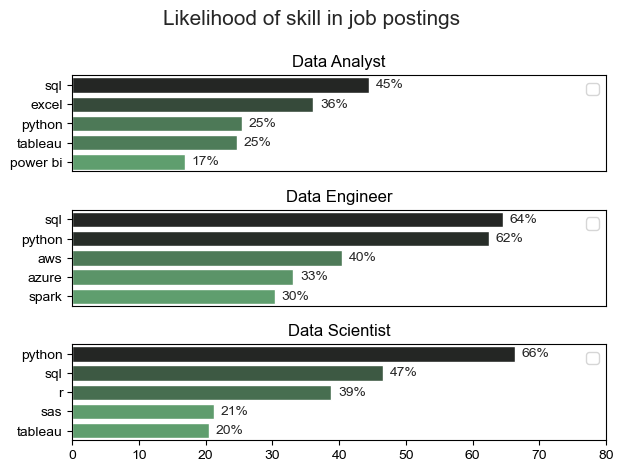

In [8]:
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short']==job_title].head(5)
    # df_plot.plot(kind='barh', x='job_skills', y='skill_perc', ax=ax[i], title=job_title)

    sns.barplot(data=df_plot, y='job_skills', x='skill_perc', ax=ax[i], hue='skill_count', palette='dark:g_r')
    ax[i].set_title(job_title)
    ax[i].legend('')
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0, 80)
    
    if i != len(job_titles) - 1:  # Lo usamos para definirque se aplique a todas excepto la ultima grafica
      ax[i].set_xticks([])

    for n, v in enumerate(df_plot['skill_perc']):     # Poner porcentajes al lado de las respectivas barras
        ax[i].text(v+1, n, f'{v:.0f}%', va='center', fontsize=10)


fig.suptitle('Likelihood of skill in job postings', fontsize=15)
fig.tight_layout()

plt.show()